## First_Example:

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


2023-12-14 21:28:29.902828: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
## Building simple network
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10,activation="softmax")  
])

In [10]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [12]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2605 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1060 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0699 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0513 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0378 - accuracy: 0.9888


In [13]:
test_digits = test_images[0:10]

In [14]:
predictions= model.predict(test_digits)
predictions[0]


1/1 [==============================] - 0s 102ms/step


array([1.6751559e-07, 3.7959786e-09, 6.5272739e-06, 2.4628365e-05,
       4.3407077e-11, 1.6689203e-08, 5.8113865e-12, 9.9996817e-01,
       1.0178562e-08, 4.2279896e-07], dtype=float32)

In [15]:
predictions[0].argmax()

7

In [16]:
predictions[0][7]

0.9999682

In [17]:
test_labels[0]

7

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0641 - accuracy: 0.9797


In [19]:
print(f"test_acc: {test_acc}")
print(f"test_loss: {test_loss}")

test_acc: 0.9797000288963318
test_loss: 0.06409997493028641


## Tensors:

#### Scalar Tensors:

In [20]:
import numpy as np
x = np.array(12)
x

array(12)

In [21]:
x.ndim

0

### Vectors(1D tensors):

In [22]:
x = np.array([12,3,6,17,4])
x

array([12,  3,  6, 17,  4])

In [23]:
x.ndim

1

##### A 5D tensor is not the same as a 5D vector. A 5D tensor will have five axes, whereas a 5D vector has just only one axis and five dimensions along it (and may have any number of dimensions along each axis)

##### Example: 5D vector:

In [24]:
y = np.array([12,0,5,10,12])


## Matrices(2D tensors):

In [25]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [26]:
x.ndim

2

## Rank n tensors:

In [27]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

In [28]:
x.ndim

3

## Tensors of Mnist:

In [29]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [30]:
train_images.ndim

3

In [31]:
train_images.shape

(60000, 28, 28)

In [32]:
train_images.dtype

dtype('uint8')

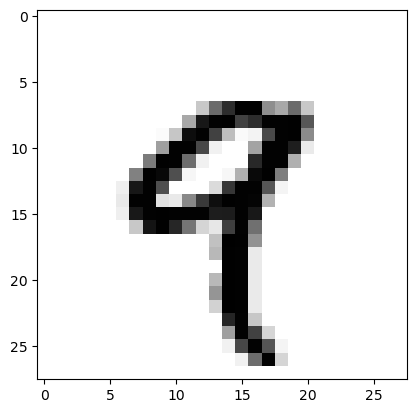

In [33]:
import matplotlib.pyplot as plt
digit = train_images[4] 
plt.imshow(digit, cmap=plt.cm.binary) 
plt.show()

In [34]:
train_labels[4]

9

## Tensor Slicing:

In [36]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [37]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [38]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [41]:
## Select the bottom 14*14 pixels of each image in our training set
my_slice = train_images[:, 14:, 14:]
## Select the center 14*14 pixels of each image in our training set
my_slice = train_images[:, 7:-7, 7:-7]

## Data Bastches:

#### The first axis (axis 0, because indexing starts at 0) in all data tensors you’ll come across in deep learning will be the samples axis.
#### In addition, deep learning models don’t process an entire dataset at once; rather, they break the data into small batches

In [42]:
batch_1 = train_images[:128]

In [43]:
batch_2 = train_images[128:256]

In [44]:
n=3
batch_n = train_images[128 * n:128 * (n + 1)]


## Naiive Relu:

In [50]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [51]:
def naive_add(x, y):
    assert len(x.shape) == 2 
    assert x.shape == y.shape 
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]): 
            x[i, j] += y[i, j]
    
    return x

In [52]:
import numpy as np 
z=x+y
z = np.maximum(z, 0.)

In [53]:
import time
x = np.random.random((20, 100))
y = np.random.random((20, 100))
t0 = time.time()
for _ in range(1000):
    z=x+y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [54]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.33 s


## Broadcasting:

In [55]:
import numpy as np
X = np.random.random((32, 10)) 
y = np.random.random((10,))

In [56]:
y.shape

(10,)

In [57]:
y = np.expand_dims(y, axis=0)

In [58]:
y.shape

(1, 10)

In [59]:
Y = np.concatenate([y] * 32, axis=0)

In [60]:
Y.shape

(32, 10)

In [61]:
def naive_add_matrix_and_vector(x, y): 
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [65]:
import numpy as np
x = np.random.random((64, 3, 32, 10)) 
y = np.random.random((32, 10))
z = np.maximum(x, y)

In [66]:
z.shape

(64, 3, 32, 10)

In [72]:
z

array([[[[0.8482665 , 0.54412911, 0.55236003, ..., 0.91107427,
          0.69740161, 0.82043748],
         [0.76716503, 0.32371373, 0.85401725, ..., 0.98722338,
          0.85503437, 0.92781201],
         [0.67588761, 0.87007865, 0.62077226, ..., 0.57822799,
          0.76166087, 0.54363613],
         ...,
         [0.31759272, 0.7975862 , 0.53198244, ..., 0.82614433,
          0.78617574, 0.96881523],
         [0.65007764, 0.6759021 , 0.90243086, ..., 0.78628537,
          0.70985574, 0.45379342],
         [0.83842497, 0.41005399, 0.53664299, ..., 0.80352834,
          0.97794644, 0.84193396]],

        [[0.8482665 , 0.54412911, 0.55236003, ..., 0.91107427,
          0.95772082, 0.68916446],
         [0.76716503, 0.74938347, 0.85401725, ..., 0.98722338,
          0.70629869, 0.77298098],
         [0.67588761, 0.87007865, 0.51875432, ..., 0.62355824,
          0.59925894, 0.89663142],
         ...,
         [0.45099087, 0.40585711, 0.9565878 , ..., 0.31166892,
          0.75943198, 0.9

## Tensor Product:

In [73]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [74]:
z

7.820588069491603

In [75]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0] 
    z = 0.
    for i in range(x.shape[0]): 
        z += x[i] * y[i]
    return z

In [76]:
naive_vector_dot(x, y)

7.820588069491601

In [78]:
def naive_matrix_vector_dot(x, y): 
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y) 
    return z

In [79]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1])) 
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

## TENSOR RESHAPING:

In [83]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])


In [84]:
x.shape

(3, 2)

In [85]:
x = x.reshape((6, 1))

In [87]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [88]:
x = x.reshape(2,3)
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [89]:
x = np.zeros((300, 20))
x = x.transpose()
x.shape

(20, 300)

## Gradient Tape in TensorFlow:

In [90]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y=2*x+3
grad_of_y_wrt_x = tape.gradient(y, x)

In [91]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [92]:
## Works also with lists
W = tf.Variable(tf.random.uniform((2, 2))) 
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])


In [93]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.027354 , 1.027354 ],
        [1.7830657, 1.7830657]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

In [95]:
W

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.4229852 , 0.4681096 ],
       [0.46051216, 0.57734275]], dtype=float32)>

In [96]:
b

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [97]:
x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.59157264, 0.89064825],
       [0.43578136, 0.89241743]], dtype=float32)>

## First_Example from scratch:

In [217]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

In [218]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [219]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

In [220]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels


In [221]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [222]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)


In [223]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

In [225]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")


In [226]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 4.36
loss at batch 100: 2.20
loss at batch 200: 2.18
loss at batch 300: 2.06
loss at batch 400: 2.17
Epoch 1
loss at batch 0: 1.88
loss at batch 100: 1.84
loss at batch 200: 1.80
loss at batch 300: 1.68
loss at batch 400: 1.78
Epoch 2
loss at batch 0: 1.56
loss at batch 100: 1.54
loss at batch 200: 1.48
loss at batch 300: 1.40
loss at batch 400: 1.46
Epoch 3
loss at batch 0: 1.30
loss at batch 100: 1.31
loss at batch 200: 1.22
loss at batch 300: 1.19
loss at batch 400: 1.24
Epoch 4
loss at batch 0: 1.11
loss at batch 100: 1.13
loss at batch 200: 1.04
loss at batch 300: 1.04
loss at batch 400: 1.08
Epoch 5
loss at batch 0: 0.97
loss at batch 100: 1.00
loss at batch 200: 0.90
loss at batch 300: 0.92
loss at batch 400: 0.97
Epoch 6
loss at batch 0: 0.86
loss at batch 100: 0.90
loss at batch 200: 0.80
loss at batch 300: 0.84
loss at batch 400: 0.89
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.81
loss at batch 200: 0.73
loss at batch 300: 0.77
loss at batch 40

In [227]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82
